In [781]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [782]:

#user defined variables
JobIDint = 2184906
Clade = "birds"
extra_naming_info = "ecoregions"
ecoregion = True 
ecoregion_code = "13"
username = 'mchari'
min_size = 0
max_size = 300
interval = 5



In [783]:
#Local variables: figure out how to automate the jobIDint feature. 
#need to redefine the local
if(ecoregion):
    save_directory = os.getcwd() + '/'+ Clade + '/' +  'ecoregion_data' + '/' + ecoregion_code + '/'
else:
    save_directory = os.getcwd() + '/'+ Clade + '/'
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295]


In [784]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    if(ecoregion):
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/ecoregion_data/'+ ecoregion_code +'/' + JOBID + '_output_files'
    else:
        hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/birds/ecoregion_data/13/2184906_output_files
transfer is done


In [785]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/" + JOBID +"_output_files/"

In [786]:
#for some reason, only went until 430 

In [787]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/2184906_output_files/


In [788]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [789]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [790]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [791]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [792]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [793]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)



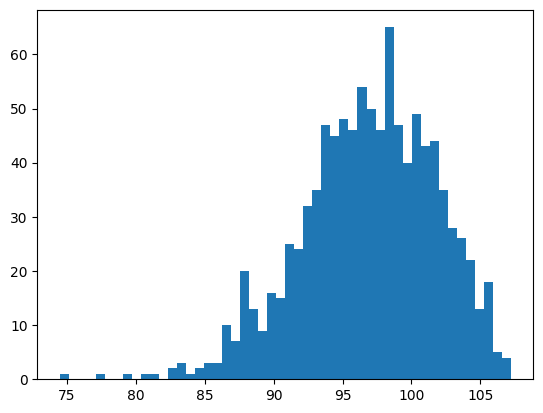

In [794]:
plt.hist(new_mpd['mpd50'], bins = 50)

plt.show()

In [795]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [796]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [797]:
#could definitely do this in a much much much much much cleaner and better way. 
def quantile_bootstrap(dictionary): #assuming normal distribution
    low_25_array =[]
    low_10_array =[]
    low_5_array = []
    low_2point5_array = []
    low_2_array = []
    low_1point5_array = []
    low_1_array = []
    low_point5_array = []
    high_25_array =[]
    high_10_array =[]
    high_5_array = []
    high_2point5_array = []
    high_2_array = []
    high_1_array = []
    high_1point5_array = []
    high_point5_array = []
    med_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        low_25 = np.percentile(data_temp, 25.0)
        low_10 = np.percentile(data_temp, 10.0)
        low_5 = np.percentile(data_temp, 5.0)
        low_2point5 = np.percentile(data_temp, 2.5)
        low_2 = np.percentile(data_temp, 2)
        low_1point5 = np.percentile(data_temp, 1.5)
        low_1 = np.percentile(data_temp, 1)
        low_point5 = np.percentile(data_temp,0.5)
        high_25 = np.percentile(data_temp, 75.0)
        high_10 = np.percentile(data_temp, 90.0)
        high_5 = np.percentile(data_temp, 95.0)
        high_2point5 = np.percentile(data_temp, 97.5)
        high_2 = np.percentile(data_temp, 98)
        high_1point5 = np.percentile(data_temp,98.5)
        high_1 = np.percentile(data_temp, 99)
        high_point5 = np.percentile(data_temp, 99.5)
        low_25_array.append(low_25)
        low_10_array.append(low_10)
        low_5_array.append(low_5)
        low_2point5_array.append(low_2point5)
        low_2_array.append(low_2)
        low_1point5_array.append(low_1point5)
        low_1_array.append(low_1)
        low_point5_array.append(low_point5)
        high_25_array.append(high_25)
        high_10_array.append(high_10)
        high_5_array.append(high_5)
        high_2point5_array.append(high_2point5)
        high_2_array.append(high_2)
        high_1point5_array.append(high_1point5)
        high_1_array.append(high_1)
        high_point5_array.append(low_point5)

        med_array.append(np.percentile(data_temp, 50)) #median value.
        mean_array.append(np.mean(data_temp))
    
    return(low_point5_array, low_1_array, low_1point5_array, low_2_array, low_2point5_array, low_5_array,low_10_array,low_25_array, high_25_array, high_10_array, high_2point5_array, high_2_array, high_1point5_array, high_1_array, high_point5_array, med_array, mean_array)



In [798]:
#cleaner version of quantiles function 
def quantile_bootstrap_clean(dictionary): 
    data = {}
    for key in dictionary.keys():
        data_temp = dictionary[key]
        quantiles = [0.5, 1, 1.5, 2, 2.5, 5, 10, 25, 75, 90, 97.5, 98, 98.5, 99, 99.5]
        percentiles = {q: np.percentile(data_temp, q) for q in quantiles}
        percentiles['Median'] = np.percentile(data_temp, 50)
        percentiles['Mean'] = np.mean(data_temp)
        data[key] = percentiles

    return pd.DataFrame(data)

In [799]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

#seems like size of 55 throws an error. 

In [800]:
quantile_mpd_bootstrap = quantile_bootstrap(new_mpd) #CI for mpd

quantile_mntd_bootstrap = quantile_bootstrap(new_mntd) #CI for mpd

quantile_pd_bootstrap = quantile_bootstrap(new_pd) #CI for mpd


#need to expor these quantile data as csvs 

In [801]:
quantile_mpd_bootstrap_clean = quantile_bootstrap_clean(new_mpd)

quantile_mntd_bootstrap_clean = quantile_bootstrap_clean(new_mntd)

quantile_pd_bootstrap_clean = quantile_bootstrap_clean(new_pd)

               pd5        pd10        pd15        pd20        pd25  \
0.5     119.685667  223.219609  335.147359  434.087118  535.653698   
1       127.159845  242.004612  350.316031  452.004012  540.709169   
1.5     131.237481  249.802239  364.567261  466.238349  548.311312   
2       138.722595  267.515550  370.450185  474.022156  560.931578   
2.5     139.573008  269.307378  379.873613  482.365597  570.241129   
5       155.975632  284.461288  397.841121  498.943544  593.963616   
10      170.081262  301.481224  417.020868  521.813694  620.651279   
25      202.570621  340.063575  452.492576  562.363286  654.671908   
75      255.709966  413.169064  537.429765  645.074438  746.077480   
90      272.083395  447.823190  570.566609  683.198403  780.882172   
97.5    302.482420  484.988386  610.356232  719.710043  820.785507   
98      302.693102  487.713016  619.810199  722.026423  827.322447   
98.5    305.898873  495.366181  624.408958  730.764720  833.015859   
99      305.901866  

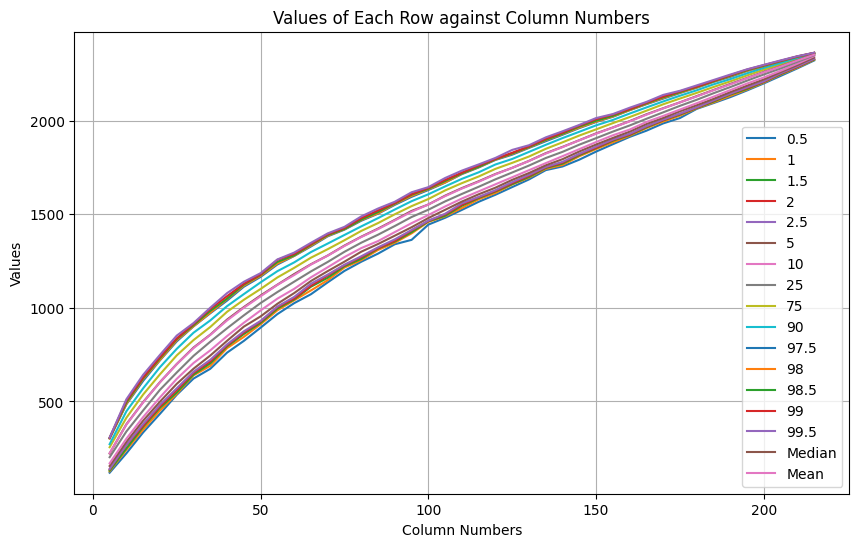

In [802]:
print(quantile_pd_bootstrap_clean)
plt.figure(figsize=(10, 6))
for index, row in quantile_pd_bootstrap_clean.iterrows():
    plt.plot([int(col[2:]) for col in quantile_pd_bootstrap_clean.columns], row, label=index)

plt.xlabel('Column Numbers')
plt.ylabel('Values')
plt.title('Values of Each Row against Column Numbers')
plt.legend()
plt.grid(True)
plt.show()

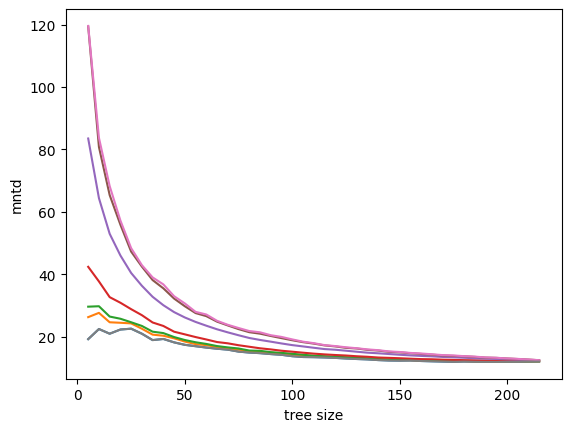

In [803]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mntd_bootstrap)-1):
    if i % 2 == 0:
        plt.plot(tree_sizes, quantile_mntd_bootstrap[i])

labels2 = ("low", "high", "mean")
plt.ylabel("mntd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

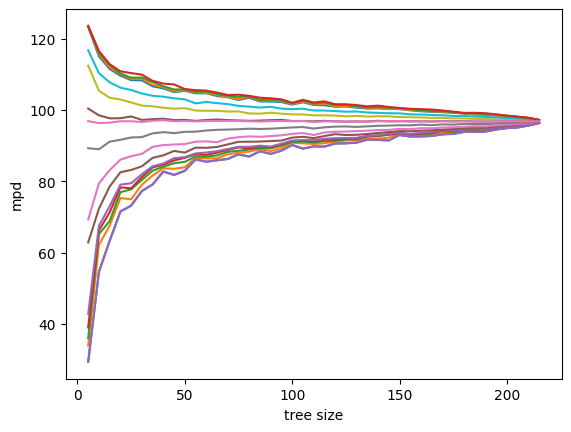

In [804]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_mpd_bootstrap)):
    plt.plot(tree_sizes, quantile_mpd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

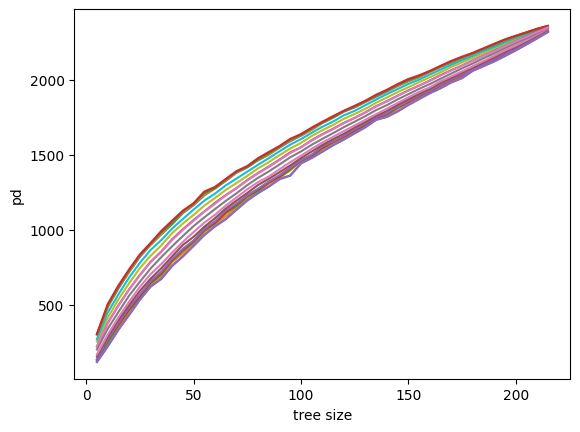

In [805]:
#print(average_mpd_rnd)

#plot the quantiles 
for i in range(len(quantile_pd_bootstrap)):
    plt.plot(tree_sizes, quantile_pd_bootstrap[i])

#labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
plt.xlabel('tree size')
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)
plt.show()

In [806]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

#os.listdir(target_directory)

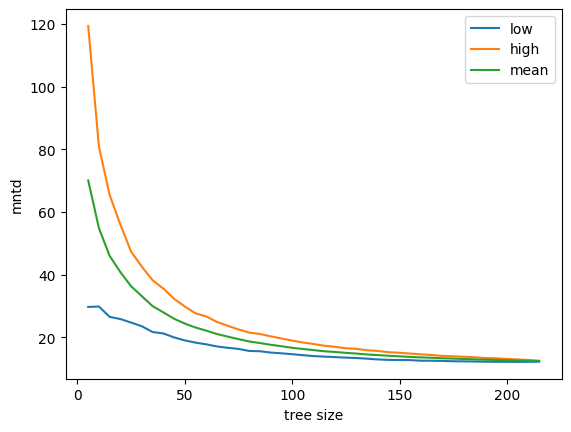

In [807]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)


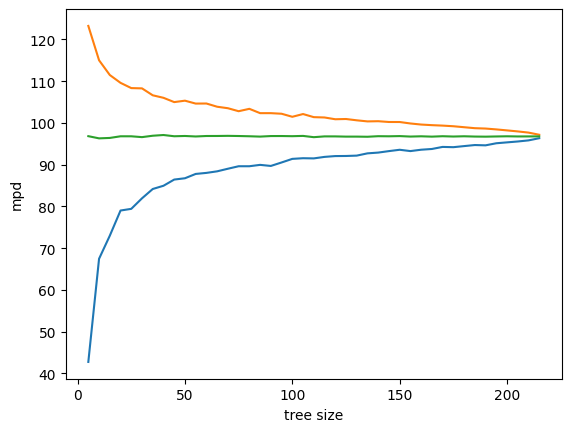

In [808]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'mpd_95CI.jpg'), dpi=1200)


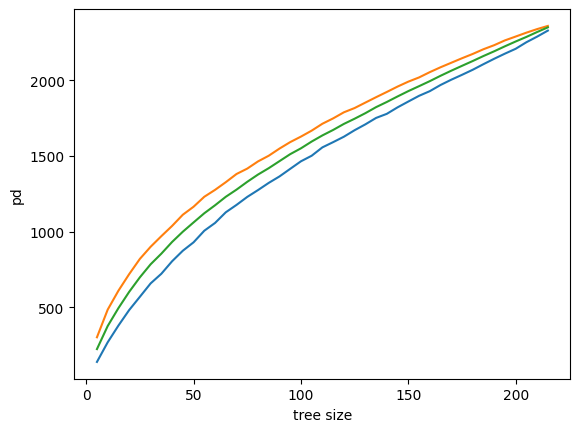

In [809]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'pd_95CI.jpg'), dpi=1200)



In [810]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_mpd_output_bootstrap_bird.csv"))


In [811]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "CI_mntd_output_bootstrap_bird.csv"))

In [812]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,extra_naming_info + "CI_pd_output_bootstrap_bird.csv"))

In [813]:

quantile_export_mpd = pd.DataFrame(quantile_mpd_bootstrap_clean)
quantile_export_mpd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mpd_output_bootstrap.csv"))

quantile_export_mntd = pd.DataFrame(quantile_mntd_bootstrap_clean)
quantile_export_mntd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_mntd_output_bootstrap.csv"))

quantile_export_pd = pd.DataFrame(quantile_pd_bootstrap_clean)
quantile_export_pd.to_csv(os.path.join(save_directory, extra_naming_info + "_quantile_pd_output_bootstrap.csv"))

